In [1]:
import os
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import math

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA

# 
from auditory_cortex.analysis.config import *
import auditory_cortex.analysis.config as config
import auditory_cortex.helpers as helpers
import auditory_cortex.utils as utils
import auditory_cortex.analysis.analysis as analysis
from utils_jgm.tikz_pgf_helpers import tpl_save


colormaps = ['winter', 'Wistia', 'copper', 'cool', 'coolwarm', 'plasma', 'inferno', 'YlGnBu']

### using new 2d colormap

In [2]:
pca_obj = analysis.PCA_topography()

Creating regression obj for: 'wave2letter_modified'
Reading cached results...!


In [3]:
layer = 6
levels = [0.9]
corr_sign_threshold = 0.3
threshold_factor=100
margin=0.8
normalized = True
pc_ind = [0, 1]

In [ ]:

z, *extent = pca_onj.compute_kde_2d(session, layer, ch, comps=comps,
                                            weighted=weighted, normalized=normalized,
                                            threshold_factor=threshold_factor)

In [6]:
aaa = {}
if not aaa:
    print("git ittt")

git ittt


Loading ANN features at bin-width: 20


TypeError: cov() got an unexpected keyword argument 'aweights'

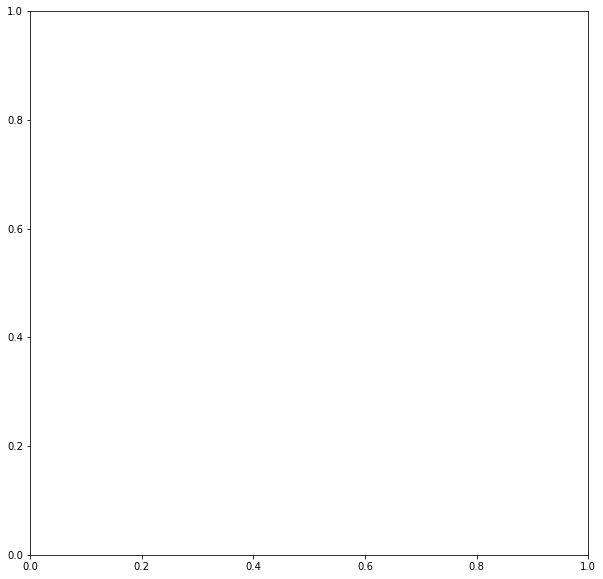

In [4]:
ax = pca_obj.plot_significant_sessions_best_channel(
                                layer,
                                levels = levels,
                                corr_sign_threshold=corr_sign_threshold,
                                comps=pc_ind,
                                normalized=normalized,
                                margin=1.0,
                                trim_axis=False,
                                threshold_factor=threshold_factor
                                )

### playing around with KDE and thresholds

In [3]:
saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/'
pretrained_dir = '/depot/jgmakin/data/auditory_cortex/pretrained_weights/w2l_modified/'
checkpoint_file = 'Wav2letter-epoch=024-val_loss=0.37.ckpt'
checkpoint = os.path.join(pretrained_dir, checkpoint_file)
pca_obj = analysis.PCA_topography(checkpoint=checkpoint)

loading weights from: /depot/jgmakin/data/auditory_cortex/pretrained_weights/w2l_modified/Wav2letter-epoch=024-val_loss=0.37.ckpt
Regression object...
Creating regression obj for: 'wav2letter_modified'
Reading cached results...!


In [4]:
layer = 8
ch = 62
comps = [0,1]
session = 200206
n = 100

pcs = pca_obj.get_pcs(layer=layer, n_components=10)[comps]

spikes = pca_obj.reg_obj.get_neural_spikes(str(int(session)))
weights=spikes[:,int(ch)]
x_min = pcs[0].min()
x_max = pcs[0].max()
y_min = pcs[1].min()
y_max = pcs[1].max()
X, Y = np.meshgrid(np.linspace(x_min,x_max,n), np.linspace(y_min, y_max,n), indexing='ij')
# X, Y = np.mgrid[x_min:x_max:nj, y_min:y_max:nj]
positions = np.vstack([X.ravel(), Y.ravel()])

kernel_null = scp.stats.gaussian_kde(dataset=pcs, weights=None)#, bw_method=kde_factor)
values_null = kernel_null(positions)
z_null = np.reshape(values_null, X.shape).T

# kde_factor = kernel_null.covariance_factor()

# kernel = scp.stats.gaussian_kde(dataset=pcs, weights=weights, bw_method=kde_factor)
# values = kernel(positions)
# z = np.reshape(values, X.shape).T
# extent = x_min, x_max, y_min, y_max


Loading ANN features at bin-width: 20
Creating new dataset object for session-200206...


In [5]:
np.max(z_null)

0.12137334845924398

In [7]:
np.max(z_null)/100

0.0012137334845924398

### explain tuning in PC space.....

In [2]:
clrm1 ='YlGnBu'
clrm2 = 'YlOrRd'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)


def cmap_2d(c1, c2):
    c3 = (c1[0],c2[1] ,0.0, c1[3])
    # c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

def get_2d_cmap(session, clrm1 ='YlGnBu', clrm2 = 'YlOrRd'):
    
    cmap1 = mpl.cm.get_cmap(clrm1)
    cmap2 = mpl.cm.get_cmap(clrm2)    
    # make a copy of session to coordinates...
    session_to_coordinates =  helpers.session_to_coordinates.copy()
    """"maps coordinates to 2d color map."""
    session = int(float(session))
    coordinates = session_to_coordinates[session]

    # mapping to 0-1 range
    coords_x = (coordinates[0] + 2)/4.0
    coords_y = (coordinates[1] + 2)/4.0
    c1 = cmap1(coords_x)
    c2 = cmap2(coords_y)
    # c3 = (c1[0],c2[1] ,0.5, c1[3])
    # c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,0.5, c1[3])
    # c3 = (c1[0],c2[1] ,0.0, c1[3])
    c3 = (c1[0],c2[1] ,0.0, c1[3])
    # c3 = cmap_2d(c1, c2)
    return c3

def plot_colormap(ax=None, n = 20):
    if ax is None:
        fig, ax = plt.subplots()

    x = np.linspace(0,1,n)
    y = np.linspace(0,1,n)
    for i in x:
        for j in y:
            c1 = cmap1(i)
            c2 = cmap2(j)
            c3 = cmap_2d(c1, c2)
            ax.scatter(i,j, color=c3)
    ax.set_title("2D colormap")

In [3]:
def plot_good_channels_for_session_and_layer(pca_obj, session, layer, levels=None, threshold=0.1,
                                    legend_spacing=1, clrm='copper', fontsize=22):
    if levels is None:
        levels = [0.7, 0.75, 0.8]
    fig, ax = plt.subplots(figsize=(10,10))
    cmap = mpl.cm.get_cmap(clrm)
    # layer = 9
    # session = 200206
    # channels = pca_obj.get_all_channels(session)
    channels = pca_obj.get_good_channels(session, layer, threshold)

    N = len(channels)
    legend_elements = []
    for i, ch in enumerate(channels):    
        cs = pca_obj.plot_kde(session, layer, ch, ax=ax, levels=levels, color=cmap(i/N))
        cc = pca_obj.get_corr_score(session, layer, ch)
        if i%legend_spacing==0:
            legend_elements.append(Line2D([0], [0], color=cmap(i/N), lw=4, 
                label=f'ch-{ch}, \u0393-{cc:.2f}'))
        
    plt.title(f"All good channels for session-{session}, layer-{layer}", fontsize=fontsize)
    cax = plt.axes([0.95, 0.2, 0.04, 0.6])
    mpl.colorbar.ColorbarBase(ax=cax, cmap=cmap, values=sorted(channels))

    ax.legend(handles=legend_elements, loc='best')
    return ax


def plot_significant_sessions_best_channel(pca_obj, layer, levels = None, fontsize=22,
                                            threshold=0.1,
                                            legend=False,
                                            ax=None):
    if levels is None:
        levels = [0.7, 0.75, 0.8]
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,10))
    # cmap = mpl.cm.get_cmap(clrm)
    sessions = pca_obj.get_significant_sessions()
    N = len(sessions)
    legend_elements = []
    counter = 0
    for i, session in enumerate(sessions):
        channels = pca_obj.get_good_channels(session, layer, threshold)
        c_map = get_2d_cmap(session)
        for k, ch in enumerate(channels):
        # ch = pca_obj.get_best_channel(session, layer)
            
            cc = pca_obj.get_corr_score(session, layer, int(ch))
            cs = pca_obj.plot_kde(session, layer, ch, ax=ax, levels=levels, color=c_map)#cmap(counter/N))
            
            legend_elements.append(Line2D([0], [0], lw=4, color=c_map,#cmap(counter/N), 
                                label=f"{int(session):6d},ch{int(ch):2d}, \u0393-{cc:.2f}"))
            counter += 1

    if legend:
        ax.legend(handles=legend_elements, loc='best')    
    ax.set_title(f"Contour plots for all significant sessions (best channels only): layer-{layer}")
    return ax

saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'

In [2]:
saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/'
pretrained_dir = '/depot/jgmakin/data/auditory_cortex/pretrained_weights/w2l_modified/'
checkpoint_file = 'Wav2letter-epoch=024-val_loss=0.37.ckpt'
checkpoint = os.path.join(pretrained_dir, checkpoint_file)
pca_obj = analysis.PCA_topography(checkpoint=checkpoint)

loading weights from: /depot/jgmakin/data/auditory_cortex/pretrained_weights/w2l_modified/Wav2letter-epoch=024-val_loss=0.37.ckpt
Regression object...
Creating regression obj for: 'wav2letter_modified'
Reading cached results...!


### plotting higher PCs

<AxesSubplot:title={'center':'All good channels for session-200206, layer-8'}>

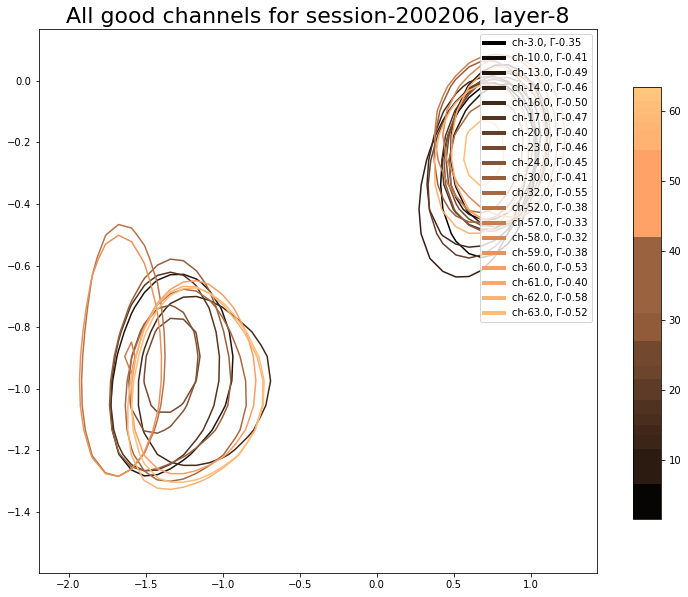

In [4]:
session = 200206
layer = 8
ch = 62
pca_obj.plot_good_channels_for_session_and_layer(session, layer, levels=[0.9],
                                                 threshold=0.4, comps=[0,2], margin=0.5)

In [79]:
def plot_select_pcs(pcs, spikes, session=200206, layer=8, threshold=0.4, levels=None, clrm='plasma'):

    if levels is None:
        levels = [0.7, 0.75, 0.8]
    fig, ax = plt.subplots(figsize=(10,10))
    cmap = mpl.cm.get_cmap(clrm)
    
    channels = pca_obj.get_good_channels(session, layer, threshold)
    # fig, ax = plt.subplots()
    N = len(channels)
    legend_elements = []
    for i, ch in enumerate(channels):    
        # cs = pca_obj.plot_kde(session, layer, ch, ax=ax, levels=levels, color=cmap(i/N))
        weights = spikes[:,int(ch)]
        z, *extent = get_kde(pcs, weights)
        plot_kde(z, extent, ax, levels=levels, color=cmap(i/N))

        cc = pca_obj.get_corr_score(session, layer, ch)
        legend_elements.append(Line2D([0], [0], color=cmap(i/N), lw=4, 
            label=f'ch-{ch}, \u0393-{cc:.2f}'))
    
    plt.title(f"All good channels for session-{session}, layer-{layer}", fontsize=12)
    # cax = plt.axes([0.95, 0.2, 0.04, 0.6])
    # mpl.colorbar.ColorbarBase(ax=cax, cmap=cmap, values=sorted(channels))

    ax.legend(handles=legend_elements, loc='best')

    return ax

def get_kde(pcs, weights):

    # 100 points on both axis
    x_min = pcs[0].min()
    x_max = pcs[0].max()
    y_min = pcs[1].min()
    y_max = pcs[1].max()
    X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    # print(pcs.shape)
    # print(weights.shape)
    # creating gaussian_kde object and getting values...
    kernel = scp.stats.gaussian_kde(dataset=pcs, weights=weights)
    values = kernel(positions)
    z = np.reshape(values, X.shape).T

    return z, x_min, x_max, y_min, y_max

def plot_kde(z, extent, ax, levels, color):
    x_min, x_max, y_min, y_max = extent
    colors = [color]
    X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    # print("For this selection: xmin, xmax, ymin, ymax are:")
    # print(extent)
    cs = ax.contour(X.T,Y.T,z/z.max(), levels=levels, colors=colors,\
        #extent= extent
        )

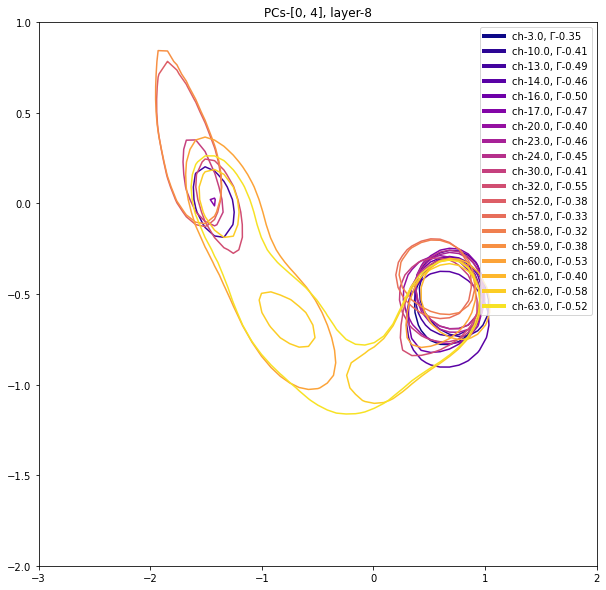

In [83]:
pc_ind = [0, 4]
layer = 8
ax = plot_select_pcs(pc_10[pc_ind], spikes, levels=[0.9])
plt.title(f"PCs-{pc_ind}, layer-{layer}")
for coll in ax.collections:
    xmax = -np.inf
    ymax = -np.inf
    xmin = np.inf
    ymin = np.inf
    for path in coll.get_paths():

        x_max, y_max = path.vertices.max(axis=0)
        xmax = max(x_max, xmax)
        ymax = max(y_max, ymax)

        x_min, y_min = path.vertices.min(axis=0)
        xmin = min(x_min, xmin)
        ymin = min(y_min, ymin)
        
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.xlim([-3, 2])
plt.ylim([-2,1])
plt.savefig(f'../../../saved_results/pcs/pc{pc_ind}_layer_8.jpg')

In [103]:
ax.figure

for coll in ax.collections:
    xmax = -np.inf
    ymax = -np.inf
    xmin = np.inf
    ymin = np.inf
    for path in coll.get_paths():

        x_max, y_max = path.vertices.max(axis=0)
        xmax = max(x_max, xmax)
        ymax = max(y_max, ymax)

        x_min, y_min = path.vertices.min(axis=0)
        xmin = min(x_min, xmin)
        ymin = min(y_min, ymin)
        
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.show()



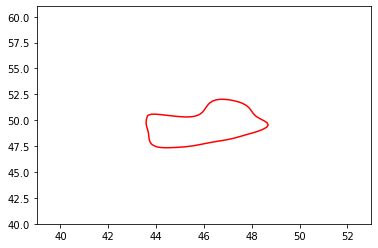

In [55]:
_, ax = plt.subplots()
levels = [0.7]
colors = ['r']
x_min = extent[0]
x_max = extent[1]
y_min = extent[2]
y_max = extent[3]

z_norm = z/z.max()
x_min = np.where(z_norm > 0.9)[0].min()
x_max = np.where(z_norm > 0.9)[0].max()
y_min = np.where(z_norm > 0.9)[1].min()
y_max = np.where(z_norm > 0.9)[1].max()


X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
# print("For this selection: xmin, xmax, ymin, ymax are:")
# print(extent)
cs = ax.contour(X.T,Y.T,z/z.max(), levels=levels, colors=colors,\
    #extent= extent
    )
# plt.xlim([x_min, x_max])
# plt.ylim([y_min, y_max])

In [46]:
norm_z.max()

1.0

In [26]:
norm_z=z/z.max()

In [27]:
level = 0.9
np.where(norm_z == level)

(array([], dtype=int64), array([], dtype=int64))

In [33]:
np.where(z == z.max()*0.9)

(array([], dtype=int64), array([], dtype=int64))

### Exploring higher PC space

In [ ]:
n_components

### Helper code

In [10]:
helpers.session_to_coordinates[191125]

[-0.5, 0.5]

In [8]:
for k, v in helpers.session_to_coordinates.items():
    print(f"{k}: {v}")

190606: [-0.4, 1.4]
190604: [-0.75, 1.25]
190726: [-0.94, 1.35]
190801: [-0.92, 1.3]
180725: [-1.01, 1.08]
180720: [-0.5, 1.15]
180731: [-0.3, 1.08]
180807: [0.18, 0.8]
180622: [0.01, 0.03]
190703: [-0.32, 0.01]
190607: [1.1, -0.8]
190605: [0.8, -0.85]
180728: [0.6, -0.75]
180619: [0.35, -0.9]
180502: [0.25, -0.8]
180405: [-0.98, 1.2]
180501: [-0.65, 1.05]
180719: [-0.3, 1.25]
180808: [-1.15, 1.15]
180627: [-0.8, 0.98]
180814: [-0.7, 0.55]
180810: [-0.55, 0.3]
180801: [-1.25, 0.2]
180417: [0.07, 0.05]
180413: [0.4, -0.4]
180420: [-0.6, -0.65]
180613: [-0.7, -0.7]
180724: [-0.95, -1.2]
180730: [0.15, -0.98]
180717: [0.02, -1.1]
180406: [0.9, -0.96]
191209: [-0.55, 0.98]
200226: [-0.7, 0.7]
200325: [0.7, 0.6]
200213: [0, 0.25]
200313: [-0.8, 0.03]
191211: [1.02, -0.08]
200323: [0.55, -0.5]
200312: [-1.02, -0.6]
200219: [-0.85, -0.8]
200401: [-0.85, -1.08]
200318: [-0.05, -1.3]
200207: [0, 1.2]
191212: [0.6, 0.7]
191206: [-0.92, 0.95]
200206: [-0.92, 0.6]
191125: [-0.5, 0.5]
200610: [-1.0

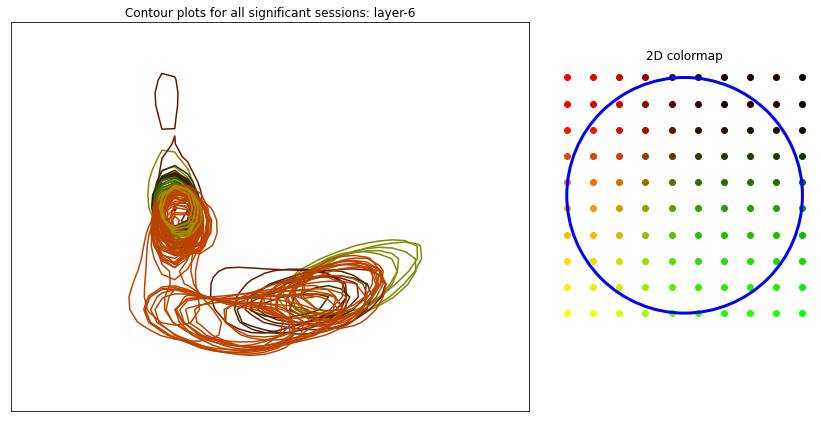

In [56]:
layer = 6
fig, axes= plt.subplots(figsize=(12, 6))
axes.axis('off')
ax = plt.axes([0.05, 0.05, 0.6, 0.9])
ax=plot_significant_sessions_best_channel(pca_obj, layer, levels=[0.9], threshold=0.2,
                                          ax=ax)
ax.set_title(f"Contour plots for all significant sessions: layer-{layer}")
ax.set_xlim([-4,4])
ax.set_ylim([-3,2])
ax.set_xticks([])
ax.set_yticks([])
# ax.axis('off')

# plotting the colormap...
ax1 = plt.axes([0.68, 0.25, 0.3, 0.6])
# plt.get_gca
circle =plt.Circle((0.5,0.5),0.5, fill=False, linewidth = 3, edgecolor='b')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')

plot_colormap(ax1, n=80)
ax1.add_artist(circle)




### testing new features

In [16]:
session = 200206
layer = 6
bin_width=20
delay=0
N_sents=500
threshold = 0.5
pca_obj.corr.data[pca_obj.corr.data['session'] == float(session)]
select_data = pca_obj.corr.data[
    (pca_obj.corr.data['session']==float(session)) & \
    (pca_obj.corr.data['bin_width']==bin_width) & \
    (pca_obj.corr.data['delay']==delay) & \
    (pca_obj.corr.data['N_sents']==N_sents) &\
    (pca_obj.corr.data['layer']==layer) &\
    (pca_obj.corr.data['normalizer'] >= threshold)   
    ]

In [19]:
# define the colormaps...
clrm1 ='Reds'
clrm2 = 'Greens'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)

def cmap_2d(c1, c2):
    # c3 = (c1[0],c2[1] ,0.5, c1[3])
    c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

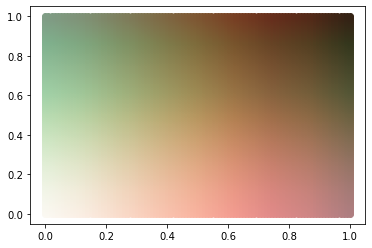

In [20]:
n = 100
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()

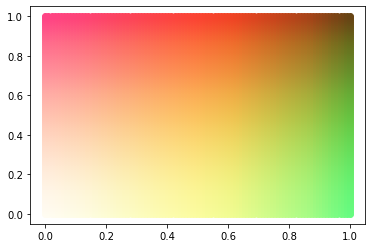

In [18]:
n = 100
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()

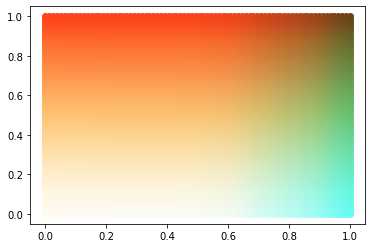

In [22]:
# define the colormaps...
clrm1 ='Reds'
clrm2 = 'Greens'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)

def cmap_2d(c1, c2):
    c3 = (c1[0],c2[1] ,c2[2], c1[3])
    # c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

n = 80
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()

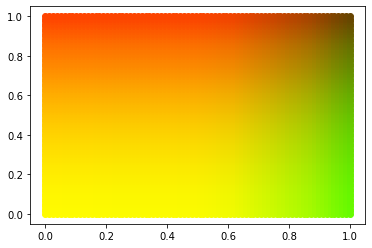

In [24]:
# define the colormaps...
clrm1 ='Reds'
clrm2 = 'Greens'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)

def cmap_2d(c1, c2):
    c3 = (c1[0],c2[1] ,0.0, c1[3])
    # c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

n = 80
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()

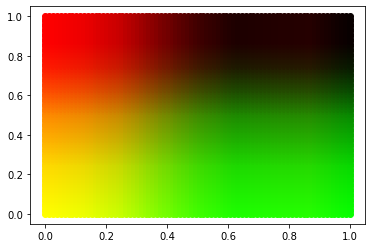

In [25]:
# define the colormaps...
clrm1 ='YlGnBu'
clrm2 = 'YlOrRd'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)

def cmap_2d(c1, c2):
    c3 = (c1[0],c2[1] ,0.0, c1[3])
    # c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

n = 80
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()

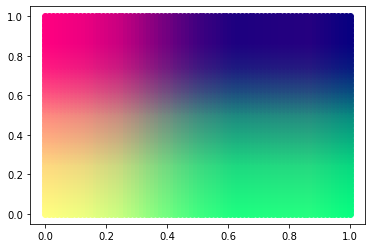

In [28]:
# define the colormaps...
clrm1 ='YlGnBu'
clrm2 = 'YlOrRd'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)

def cmap_2d(c1, c2):
    c3 = (c1[0],c2[1] ,0.5, c1[3])
    # c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

n = 80
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()

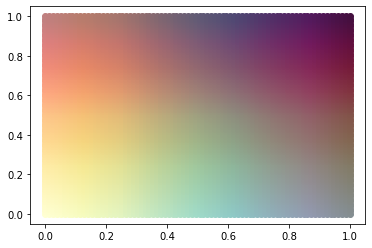

In [26]:
# define the colormaps...
clrm1 ='YlGnBu'
clrm2 = 'YlOrRd'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)

def cmap_2d(c1, c2):
    # c3 = (c1[0],c2[1] ,0.0, c1[3])
    c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

n = 80
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()

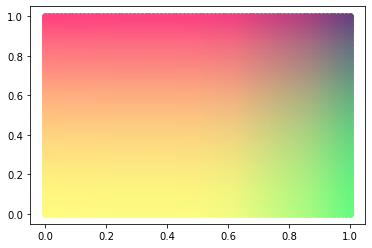

In [23]:
# define the colormaps...
clrm1 ='Reds'
clrm2 = 'Greens'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)

def cmap_2d(c1, c2):
    c3 = (c1[0],c2[1] ,0.0, c1[3])
    # c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

n = 80
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()

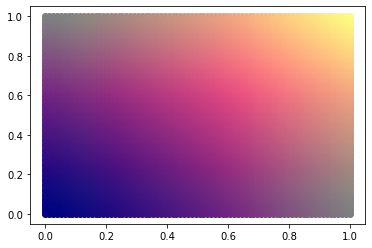

In [6]:
# define the colormaps...
clrm1 ='magma'
clrm2 = 'magma'
cmap1 = mpl.cm.get_cmap(clrm1)
cmap2 = mpl.cm.get_cmap(clrm2)

def cmap_2d(c1, c2):
    # c3 = (c1[0],c2[1] ,0.5, c1[3])
    # c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,(c1[2]+c2[2])/2.0, c1[3])
    c3 = ((c1[0] + c2[0])/2.0,(c1[1] + c2[1])/2.0 ,0.5, c1[3])
    # (c1[2]+c2[2])/2.0
    return c3

n = 80
x = np.linspace(0,1,n)
y = np.linspace(0,1,n)
for i in x:
    for j in y:
        c1 = cmap1(i)
        c2 = cmap2(j)
        c3 = cmap_2d(c1, c2)
        plt.scatter(i,j, color=c3)
plt.show()
    

In [17]:
select_data['channel'].tolist()

[13.0, 14.0, 17.0, 20.0, 23.0, 24.0, 32.0, 58.0, 59.0, 60.0, 62.0]

In [5]:
helpers.session_to_coordinates[200206]

[-0.92, 0.6]

In [3]:
pca_obj.corr.get_good_channels(session=200206, layer=6, threshold=0.5)

[13.0, 14.0, 17.0, 20.0, 23.0, 24.0, 32.0, 58.0, 59.0, 60.0, 62.0]

### plotting the results...

(-3.0, 2.0)

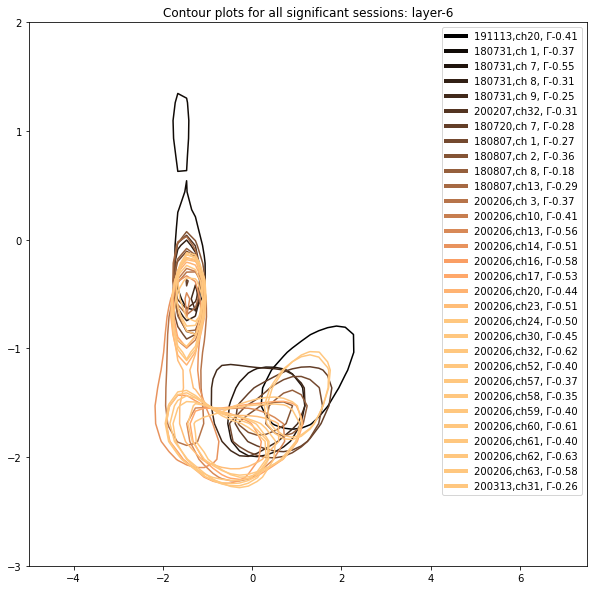

In [31]:
layer = 6
ax=plot_significant_sessions_best_channel(pca_obj, layer, levels=[0.9], threshold=0.4, clrm=colormaps[-6])
ax.set_title(f"Contour plots for all significant sessions: layer-{layer}")
ax.set_xlim([-5,7.5])
ax.set_ylim([-3,2])
# ax.set_xticks([])
# ax.set_yticks([])

# # plt.savefig(os.path.join(saved_results, f'pca_topology_all_sessions_layer_{layer}.jpg'))
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'pca_topology_all_sessions_layer_{layer}.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )


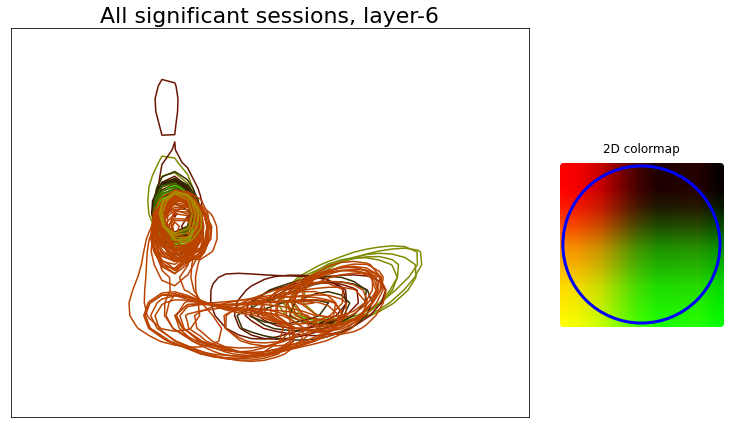

In [16]:
layer = 6
fig, axes= plt.subplots(figsize=(12, 6))
axes.axis('off')
fontsize= 22
ax = plt.axes([0.05, 0.05, 0.6, 0.9])
ax=plot_significant_sessions_best_channel(pca_obj, layer, levels=[0.9], threshold=0.2,
                                          ax=ax, fontsize=fontsize)
ax.set_title(f"All significant sessions, layer-{layer}", fontsize=fontsize)
ax.set_xlim([-4,4])
ax.set_ylim([-3,2])
ax.set_xticks([])
ax.set_yticks([])
# ax.axis('off')

# plotting the colormap...
ax1 = plt.axes([0.68, 0.25, 0.2, 0.4])
# plt.get_gca
circle =plt.Circle((0.5,0.5),0.5, fill=False, linewidth = 3, edgecolor='b')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')

plot_colormap(ax1, n=80)
ax1.add_artist(circle)

saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/'
plt.savefig(os.path.join(saved_results,'svg_files' ,f'pca_topology_all_sessions_layer_{layer}.svg'))
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'pca_topology_all_sessions_layer_{layer}.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

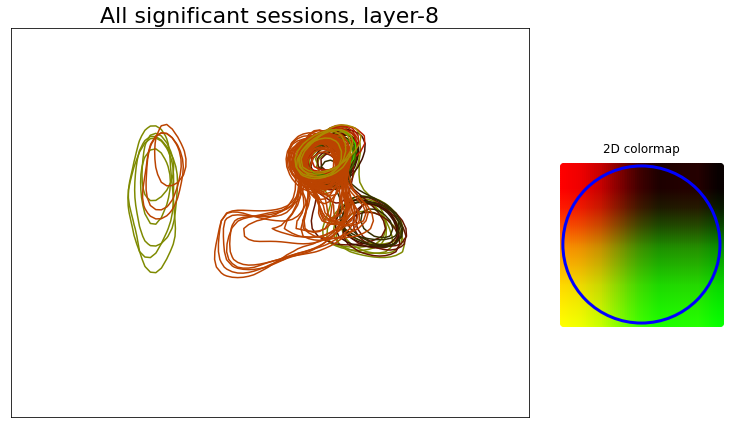

In [17]:
layer = 8
fig, axes= plt.subplots(figsize=(12, 6))
axes.axis('off')
ax = plt.axes([0.05, 0.05, 0.6, 0.9])
ax=plot_significant_sessions_best_channel(pca_obj, layer, levels=[0.9], threshold=0.2,
                                          ax=ax, fontsize=fontsize)
ax.set_title(f"All significant sessions, layer-{layer}", fontsize=fontsize)
ax.set_xlim([-4,4])
ax.set_ylim([-3,2])
ax.set_xticks([])
ax.set_yticks([])
# ax.axis('off')

# plotting the colormap...
ax1 = plt.axes([0.68, 0.25, 0.2, 0.4])
# plt.get_gca
circle =plt.Circle((0.5,0.5),0.5, fill=False, linewidth = 3, edgecolor='b')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')

plot_colormap(ax1, n=80)
ax1.add_artist(circle)

saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/'
plt.savefig(os.path.join(saved_results,'svg_files' ,f'pca_topology_all_sessions_layer_{layer}.svg'))
# plt.savefig(os.path.join(saved_results, f'pca_topology_all_sessions_layer_{layer}.jpg'))
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'pca_topology_all_sessions_layer_{layer}.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

In [ ]:
layer = 7
plot_significant_sessions_best_channel(pca_obj, layer, levels=[0.8], threshold=0.4)

<AxesSubplot:title={'center':'Contour plots for all significant sessions (best channels only): layer-8'}>

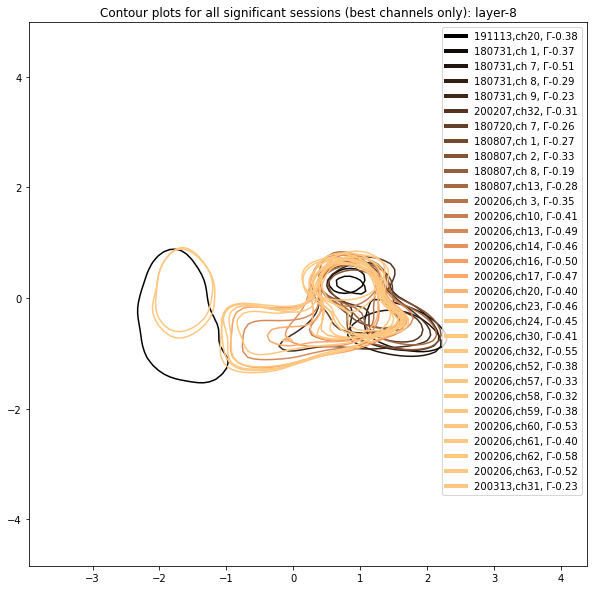

In [32]:
layer = 8
plot_significant_sessions_best_channel(pca_obj, layer, levels=[0.8], threshold=0.4)
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'pca_topology_all_sessions_layer_{layer}.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

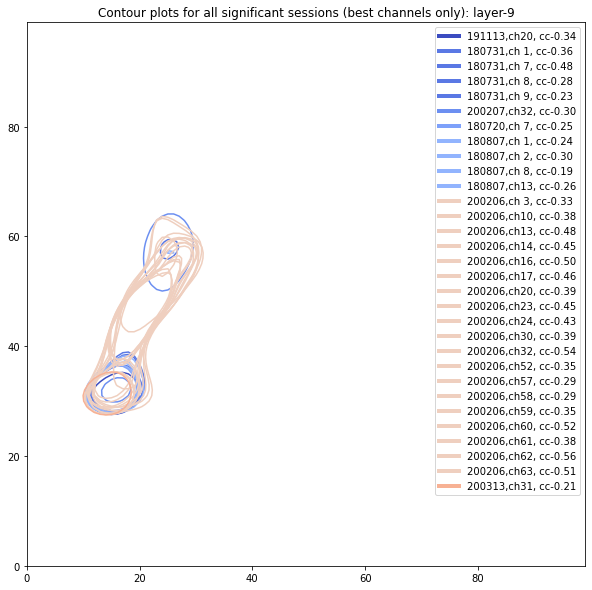

In [51]:
layer = 9
plot_significant_sessions_best_channel(pca_obj, layer, levels=[0.8], threshold=0.4)

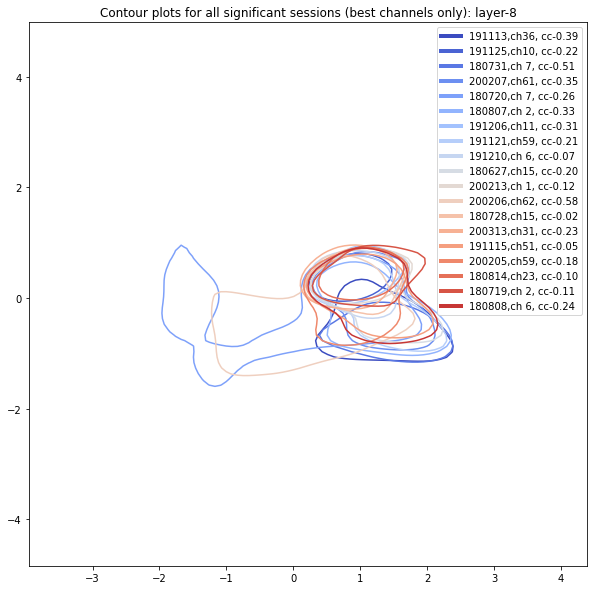

In [33]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10,10))
cmap = mpl.cm.get_cmap('coolwarm')
layer = 8
sessions = pca_obj.get_significant_sessions()
N = len(sessions)
legend_elements = []
for i, session in enumerate(sessions):
    
    ch = pca_obj.get_best_channel(session, layer)
    cc = pca_obj.get_corr_score(session, layer, ch)
    cs = pca_obj.plot_kde(session, layer, ch, ax=ax, levels=[0.7], color=cmap(i/N))
    legend_elements.append(Line2D([0], [0], lw=4, color=cmap(i/N), 
                        label=f'{int(session):6d},ch{int(ch):2d}, cc-{cc:.2f}'))

ax.legend(handles=legend_elements, loc='best')    
plt.title(f"Contour plots for all significant sessions (best channels only): layer-{layer}")
plt.show()

### Within session 

(15.0, 45.0)

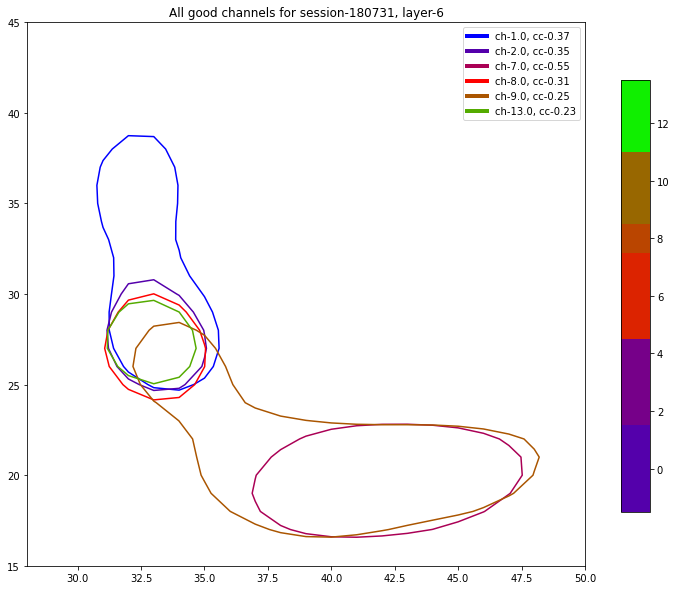

In [109]:
session = 180731
layer=6
ax=plot_good_channels_for_session_and_layer(pca_obj, session, layer, threshold=0.3, levels=[0.85], clrm='brg')
ax.set_xlim([28,50])
ax.set_ylim([15,45])
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )


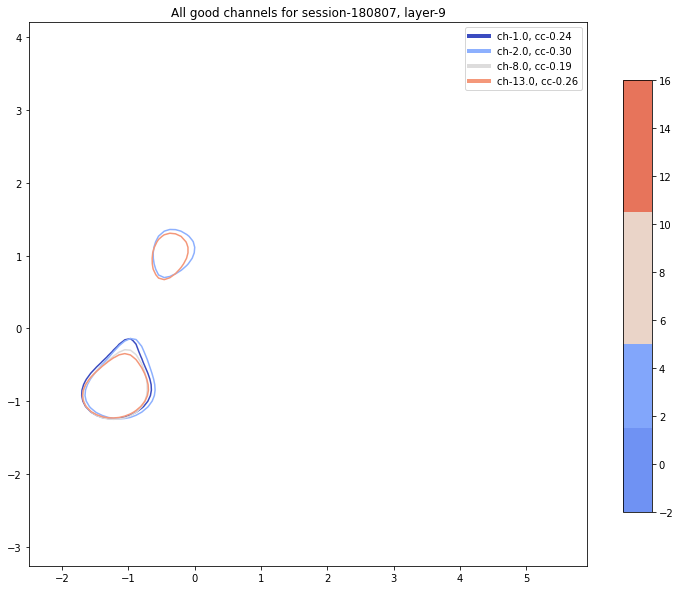

In [36]:
session = 180807
layer=9
plot_good_channels_for_session_and_layer(pca_obj, session, layer, threshold=0.4, levels=[0.7])

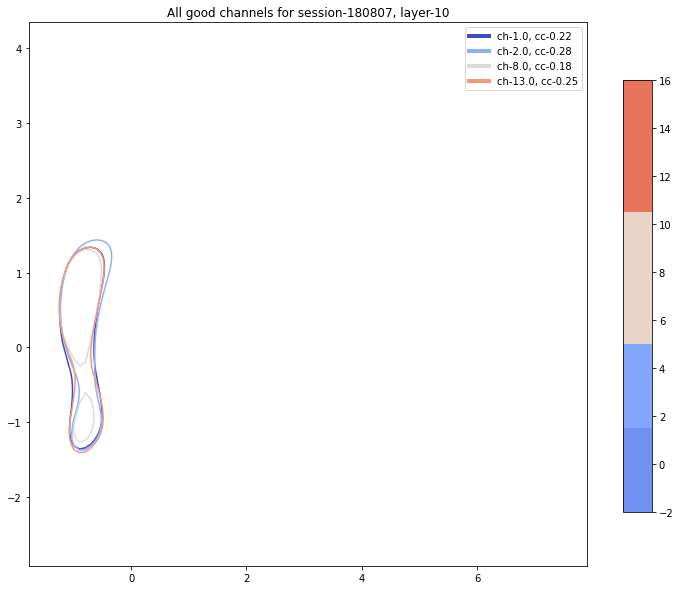

In [37]:
session = 180807
layer=10
plot_good_channels_for_session_and_layer(pca_obj, session, layer, threshold=0.4, levels=[0.7])

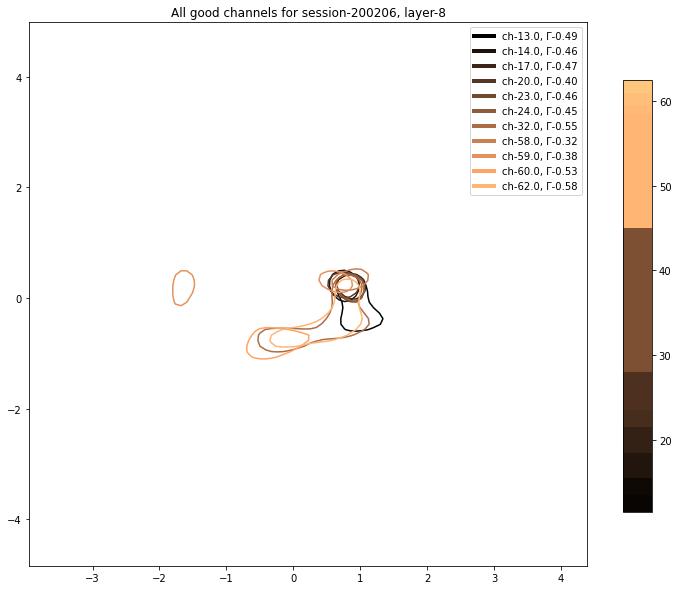

In [75]:
session = 200206
layer=8
ax = plot_good_channels_for_session_and_layer(pca_obj, session, layer, levels=[0.95], threshold=0.5)
# ax.set_xlim([23,73])
# ax.set_ylim([35,60])
# ax.set_xticks([])
# ax.set_yticks([])

# # plt.savefig(os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.jpg'))
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

In [19]:
thres = 0.4
clrm = 'plasma'

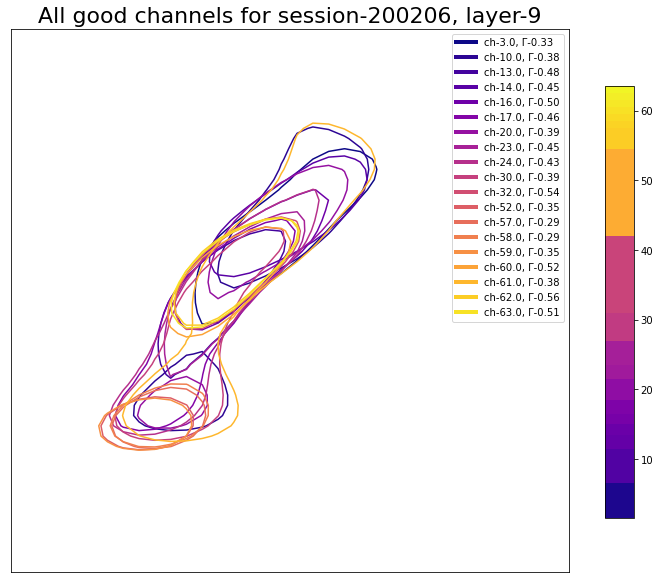

In [20]:
session = 200206
layer=9
fontsize = 22
ax = plot_good_channels_for_session_and_layer(pca_obj, session, layer, levels=[0.9], threshold=thres, clrm=clrm, fontsize=fontsize)
ax.set_xlim([-2,1])
ax.set_ylim([-2,2])
ax.set_xticks([])
ax.set_yticks([])


plt.savefig(os.path.join(saved_results, 'svg_files',f'pca_topology_session_{session}_layer_{layer}.svg'))
# plt.savefig(os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.jpg'))
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{4.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

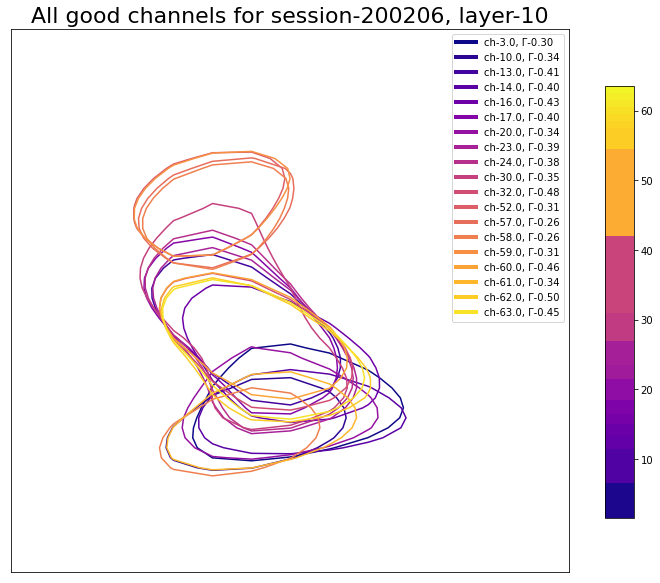

In [21]:
session = 200206
layer=10
ax = plot_good_channels_for_session_and_layer(pca_obj, session, layer, levels=[0.9], threshold=thres, clrm=clrm, fontsize=fontsize)
ax.set_xlim([-1.4,0])
ax.set_ylim([-2,2])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig(os.path.join(saved_results, 'svg_files',f'pca_topology_session_{session}_layer_{layer}.svg'))
# plt.savefig(os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.jpg'))
extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.tex'),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    pre_tikzpicture_lines={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

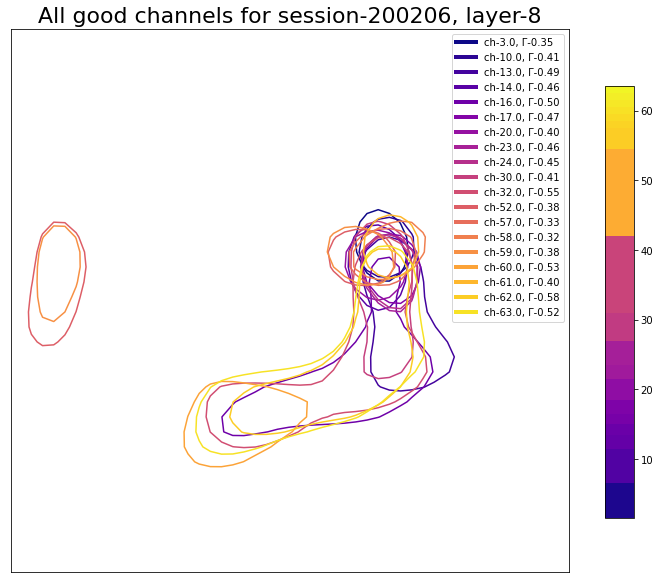

In [22]:
session = 200206
layer=8
ax = plot_good_channels_for_session_and_layer(pca_obj, session, layer, levels=[0.95],
                                               threshold=thres, clrm=clrm, fontsize=fontsize)
ax.set_xlim([-2,2.2])
ax.set_ylim([-1.8,1.8])
ax.set_xticks([])
ax.set_yticks([])
plt.savefig(os.path.join(saved_results, 'svg_files',f'pca_topology_session_{session}_layer_{layer}.svg'))

# plt.savefig(os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.jpg'))
extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(saved_results, f'pca_topology_session_{session}_layer_{layer}.tex'),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    pre_tikzpicture_lines={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

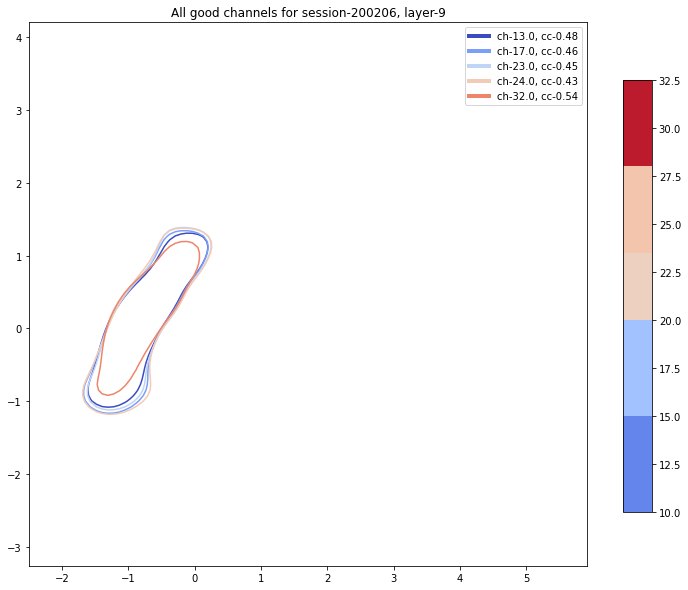

In [25]:
session = 200206
layer=9
plot_good_channels_for_session_and_layer(pca_obj, session, layer, levels=[0.7],threshold=0.6)

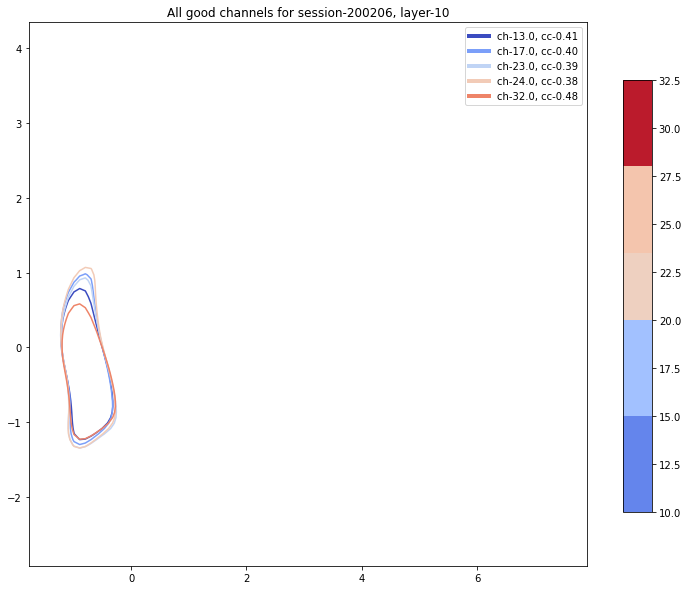

In [24]:
session = 200206
layer=10
plot_good_channels_for_session_and_layer(pca_obj, session, layer, levels=[0.7], threshold=0.6)

In [30]:
sessions = [180808, 180807, 200206, 191210, 200205]

### corr scores analysis

In [110]:
df = pca_obj.corr.data

In [111]:
session = 200206
w = 20
d = 0
N_sents = 500
sess = df[
    (df['session']==session) &\
    (df['bin_width']==w) &\
    (df['delay']==d) &\
    (df['N_sents']==N_sents)
        ]

In [113]:
sess = sess[sess['normalizer'] > 0.1] # significant only

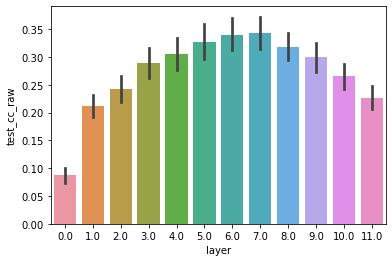

In [119]:
sns.barplot(data=sess, x="layer", y="test_cc_raw", )
extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(saved_results, f'cc_barplot_session_{session}.tex'),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    pre_tikzpicture_lines={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

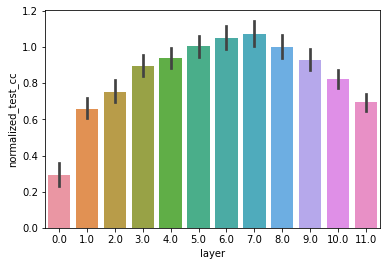

In [120]:
sns.barplot(data=sess, x="layer", y="normalized_test_cc", )
extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(saved_results, f'cc_barplot_session_{session}_normalized.tex'),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    pre_tikzpicture_lines={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

In [117]:
sess.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
92112,200206.0,0.0,0.0,20.0,0.0,0.101311,0.063902,0.183260,500.0,0.348694
92113,200206.0,0.0,1.0,20.0,0.0,0.056802,0.022522,0.221996,500.0,0.101452
92114,200206.0,0.0,2.0,20.0,0.0,0.041514,0.006953,0.141343,500.0,0.049192
92115,200206.0,0.0,3.0,20.0,0.0,0.077678,0.040489,0.421509,500.0,0.096057
92116,200206.0,0.0,4.0,20.0,0.0,0.085998,0.050898,0.122561,500.0,0.415291


#### back to pca

In [121]:
N = len(sessions)
cmap = mpl.colors.ListedColormap(np.random.rand(N,3))


NameError: name 'sessions' is not defined

In [ ]:
# def save_kde(session, layer, ch):
kde_results 
if session in kde_results.keys():
    prev_result = kde_results[session]
else:
    prev_result = {
        'layer-channel': np.zeros((12, 64)),
        'kde': np.zeros((12,64, 100, 100)),
        'extent': [],
        }
if prev_result['layer-channel'][layer, ch] == 0:
    z, *extent = pca_obj.get_kde(session, layer, ch)
    prev_result['kde'][layer,ch,:,:] = z
    prev_result['layer-channel'][layer, ch] = 1




In [10]:
session = '200206'
kde_object = {}
if session in pca_obj.list_loaded_sessions():
    channels = pca_obj.reg_obj.get_dataset_object(session).num_channels
    kde_object[session] = {'layers': [], 'channels':[], 'kde': np.zeros((12,channels, 100, 100))}
    print(channels)

AttributeError: 'Regression' object has no attribute 'get_dataset_object'

In [ ]:
def get_kde(session, layer, ch):
    pcs = pca_obj.get_pcs(layer=layer)
    spikes = pca_obj.obj.get_neural_spikes(str(int(session)))

    # 100 points on both axis
    x_min = pcs[0].min()
    x_max = pcs[0].max()
    y_min = pcs[1].min()
    y_max = pcs[1].max()
    X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    # creating gaussian_kde object and getting values...
    kernel = scp.stats.gaussian_kde(dataset=pcs, weights=spikes[:,ch])
    values = kernel(positions)
    z = np.reshape(values, X.shape)

    return z, x_min, x_max, y_min, y_max

### Plotting kde...!

In [3]:
sessions = [180808, 180807, 200206]#, 191210, 200205]

def plot_kde_sessions(pca_obj, sessions, layer):
    """Takes in PCA_topography object and plots projections on 2d space."""
    fig, ax = plt.subplots(figsize=(8,8))
    for i, session in enumerate(sessions):
        hd = pca_obj.plot_kde(session=session, layer=layer, ax=ax)
        # kde.append(hd)
    plt.title(f"PCA space for layer-{layer}")    
    # plt.xlim([-10, 0])
    # plt.ylim([-5, 5])
    # ax.legend(loc='best')
    ax.legend(sessions)



Plotting session-180808
Plotting session-180807
Plotting session-200206


(-5.0, 5.0)

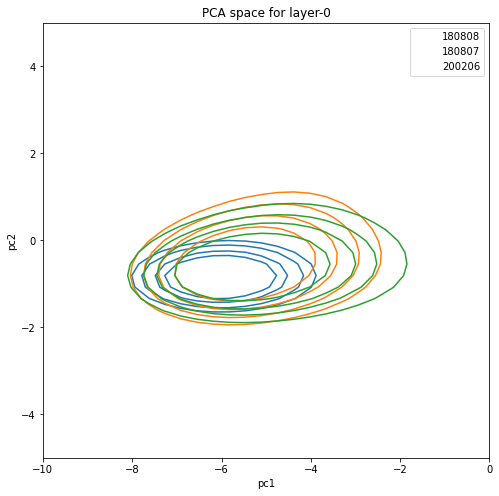

In [5]:
sessions = [180808, 180807, 200206]
plot_kde_sessions(pca_obj, sessions, layer=0)
plt.xlim([-10, 0])
plt.ylim([-5, 5])

Plotting data for session-180808...
Plotting data for session-180807...
Plotting data for session-200206...
Plotting data for session-191210...
Plotting data for session-200205...


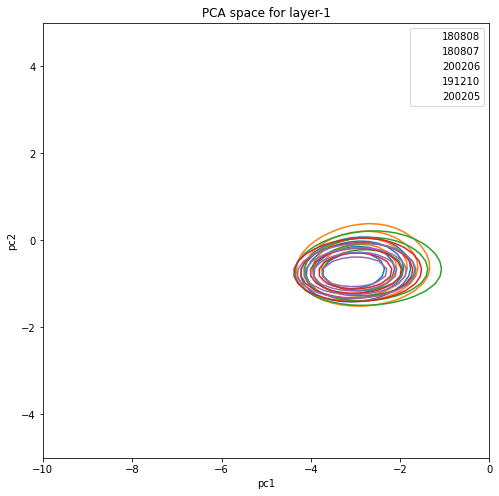

In [6]:
layer=1
plot_kde_sessions(pca_obj, sessions, layer=layer)
plt.xlim([-5, 0])
plt.ylim([-4, 4])

Plotting session-180808
Plotting session-180807
Plotting session-200206


(-5.0, 5.0)

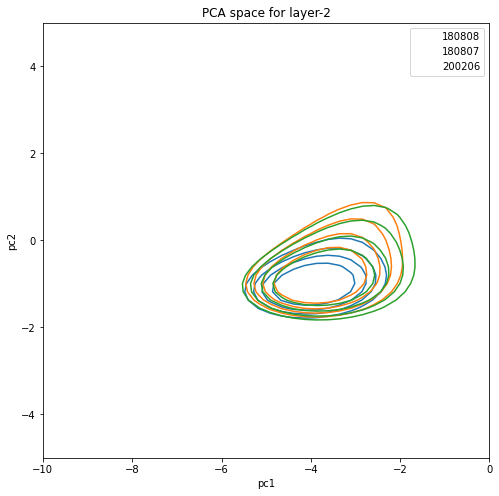

In [6]:
layer=2
plot_kde_sessions(pca_obj, sessions, layer=layer)
plt.xlim([-10, 0])
plt.ylim([-5, 5])


Creating new dataset object for session-180808...
Plotting session-180808
Creating new dataset object for session-180807...
Plotting session-180807
Creating new dataset object for session-200206...
Plotting session-200206


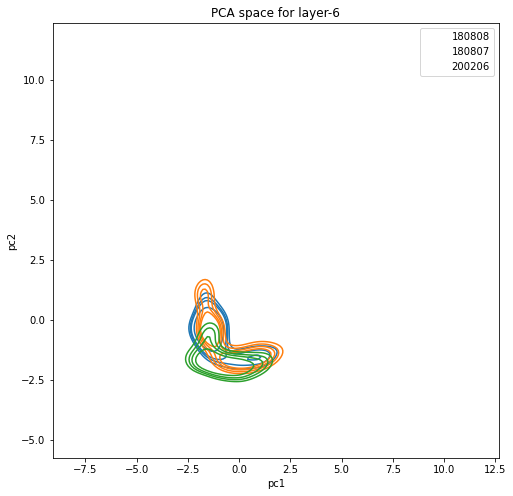

In [4]:
sessions = [180808, 180807, 200206]#, 191210, 200205]
layer=6
plot_kde_sessions(pca_obj, sessions, layer=layer)

Creating new dataset object for session-180808...
Plotting data for session-180808...
Creating new dataset object for session-180807...
Plotting data for session-180807...


(-5.0, 5.0)

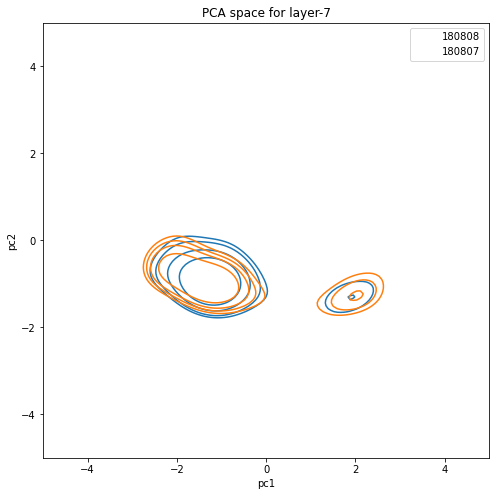

In [4]:
layer=7
plot_kde_sessions(pca_obj, sessions, layer=layer)
plt.xlim([-5, 5])
plt.ylim([-5, 5])


Plotting session-180808
Plotting session-180807
Plotting session-200206


(-4.0, 4.0)

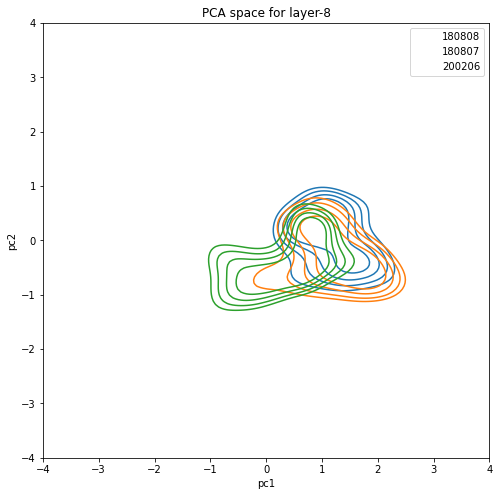

In [7]:
layer=8
plot_kde_sessions(pca_obj, sessions, layer=layer)
plt.xlim([-4, 4])
plt.ylim([-4, 4])

Plotting session-180808
Plotting session-180807
Plotting session-200206


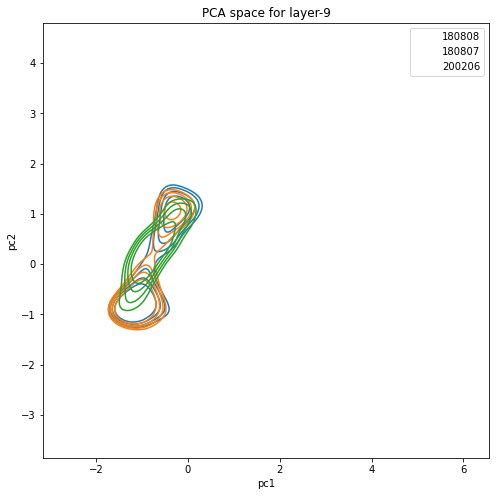

In [8]:
layer=9
plot_kde_sessions(pca_obj, sessions, layer=layer)


Plotting session-180808
Plotting session-180807
Plotting session-200206


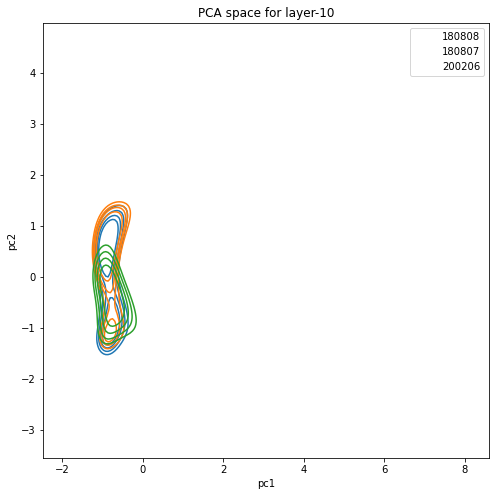

In [9]:
layer=10
plot_kde_sessions(pca_obj, sessions, layer=layer)


In [ ]:
layer=11
plot_kde_sessions(pca_obj, sessions, layer=layer)


In [2]:
corr = analysis.correlations()
print(corr.data.head())
# sig_data = corr.corr_results[corr.corr_results['normalizer'] > corr.sig_threshold]
# print(sig_data['session'].unique())



    session  layer  channel  bin_width  delay  train_cc_raw  test_cc_raw  \
0  191113.0    0.0      0.0       40.0    0.0      0.046857    -0.016149   
1  191113.0    0.0      1.0       40.0    0.0      0.187930     0.123113   
2  191113.0    0.0      2.0       40.0    0.0      0.175732     0.124929   
3  191113.0    0.0      3.0       40.0    0.0      0.087614     0.034642   
4  191113.0    0.0      4.0       40.0    0.0      0.050437    -0.012446   

   normalizer  N_sents  normalized_test_cc  
0   -0.007541    500.0            2.141444  
1    0.093085    500.0            1.322590  
2    0.064035    500.0            1.950964  
3    0.032557    500.0            1.064028  
4   -0.006368    500.0            1.954458  


In [3]:
session = 200206
bin_width = 20
delay = 0
layer = 0
N_sents = 500
select_data = corr.data[
    (corr.data['session']==session) & \
    (corr.data['bin_width']==bin_width) & \
    (corr.data['delay']==delay) & \
    (corr.data['N_sents']==N_sents) &\
    (corr.data['layer']==layer)   
    ]

In [7]:
corr.get_best_channel(session, layer)

52.0

In [8]:
print(corr.get_all_sessions())

obj = helpers.get_regression_obj('200206', load_features=False)
print("Obj has been created...!")
features = obj.load_features(bin_width=20, load_raw=True, numpy=True)
print(type(features))

[191113. 191125. 180731. 200207. 180720. 180807. 191206. 191121. 191210.
 200212. 180627. 180717. 200219. 190604. 200213. 200206. 180725. 180613.
 200318. 180730. 180728. 200313. 191212. 191219. 191115. 200205. 190606.
 190726. 190605. 180622. 190703. 190801. 180502. 180501. 191211. 180420.
 180413. 180814. 180724. 191209. 180719. 180808. 180810. 200226. 190607.]
Creating dataset and other objects...
Creating regression obj for: 'wav2letter_modified'
Obj has been created...!
<class 'dict'>


In [2]:
obj = helpers.get_regression_obj('200206', load_features=False)
print("Obj has been created...!")
# features = obj.load_features(bin_width=20, load_raw=True, numpy=True)
# print(type(features))

Creating dataset and other objects...
Creating regression obj for: 'wav2letter_modified'
Obj has been created...!


In [3]:
spikes = obj.get_neural_spikes('200206')

Creating new dataset object...


In [12]:
float(float('200206'))

200206.0

In [4]:
spikes.shape

(51333, 64)

In [8]:
spks = obj.get_neural_spikes('200206', force_reload=True)

Creating new dataset object...


In [6]:
spks.shape

(51333, 64)

In [7]:
obj.neural_spikes.keys()

dict_keys(['200206'])

### Earlier work...!

In [ ]:
import os
import pandas as pd
import soundfile
import yaml
from wav2letter.datasets import Dataset, LSDataModule, DataModuleRF
from wav2letter.models import LitWav2Letter, Wav2LetterRF
import torchaudio
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from scipy.io import wavfile
import auditory_cortex.models as Reg
import auditory_cortex.utils as utils
import numpy as np
import cupy as cp
import pickle
import time
from utils_jgm.tikz_pgf_helpers import tpl_save
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
def get_reg_obj(sub, file_name = 'c_w2l_correlations.csv', load_features=False):
    dir = os.getcwd()
    conf_file = 'config_rf.yaml'
    manifest_file = os.path.join(dir,"Wav2Letter","wav2letter","conf",conf_file)
    with open(manifest_file, 'r') as f:
        model_param = yaml.load(f, Loader=yaml.FullLoader)
    print(f"Batch size: {model_param['batch_size']}")

    # Create model with pretrained weights....!
    checkpoint_file = "Wav2letter-epoch=024-val_loss=0.37.ckpt"
    checkpoint = os.path.join(model_param["results_dir"],checkpoint_file)
    mod = Wav2LetterRF.load_from_checkpoint(checkpoint, manifest=model_param)

    reg_conf = '/home/ahmedb/projects/Wav2Letter/Auditory_Cortex/conf/regression_w2l.yaml'
    with open(reg_conf, 'r') as f:
        config = yaml.load(f, Loader=yaml.FullLoader)
    data_dir = config['data_dir']
    data_dir = '/scratch/gilbreth/ahmedb/auditory_cortex'
    #sub = config['sub']
    results_dir = config['results_dir']
    # sub = '200206'
    print(f"working with sub: {sub}...!")
    obj = Reg.Regression(data_dir, sub, model=mod, load_features=load_features)
    if load_features:
        obj.load_features_and_spikes()
    
    file_path = os.path.join(results_dir, 'cross_validated_correlations', file_name)
    return obj, file_path

In [3]:
dir = os.getcwd()
conf_file = 'config_rf.yaml'
manifest_file = os.path.join(dir,"Wav2Letter","wav2letter","conf",conf_file)
with open(manifest_file, 'r') as f:
    model_param = yaml.load(f, Loader=yaml.FullLoader)
print(f"Batch size: {model_param['batch_size']}")

# Create model with pretrained weights....!
checkpoint_file = "Wav2letter-epoch=024-val_loss=0.37.ckpt"
checkpoint = os.path.join(model_param["results_dir"],checkpoint_file)
mod = Wav2LetterRF.load_from_checkpoint(checkpoint, manifest=model_param)

reg_conf = '/home/ahmedb/projects/Wav2Letter/Auditory_Cortex/conf/regression_w2l.yaml'
with open(reg_conf, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
data_dir = config['data_dir']
sub = config['sub']
results_dir = config['results_dir']
# sub = '200206'
print(f"working with sub: {sub}...!")
obj = Reg.Regression(data_dir, sub, model=mod, load_features=False)
# obj.load_features_and_spikes()

Batch size: 8
working with sub: 200206...!
Creating dataset and other objects...
Creating regression obj for: 'wav2letter_modified'


In [4]:
obj.load_features_and_spikes(bin_width = 20, load_raw=True)
features = obj.features
spikes_200206 = obj.spikes

### Variance explained

In [5]:
import auditory_cortex.helpers as helpers
obj = helpers.get_regression_obj()
obj.load_features_and_spikes(bin_width = 20, load_raw=True)
features = obj.features
spikes_200206 = obj.spikes


loading weights from: /depot/jgmakin/data/auditory_cortex/pretrained_weights/w2l_modified/Wav2letter-epoch=024-val_loss=0.37.ckpt
Regression object...
Creating regression obj for: 'wav2letter_modified'
Loading ANN features at bin-width: 20


PCA(n_components=10)

[0.07680544 0.04364144 0.04162539 0.03790336 0.0328331  0.03132033
 0.02492928 0.02369536 0.02152646 0.02040814 0.0196716  0.01843412
 0.01713518 0.01467803 0.0139518  0.01362213 0.01265752 0.01225411
 0.011746   0.01173524 0.01049017 0.01021813 0.00973206 0.00905416
 0.00857459 0.008289   0.00798914 0.00763828 0.00747806 0.00720269]
0.5872403006069362


Text(0.5, 1.0, 'Variance explained by PCs - layer-8')

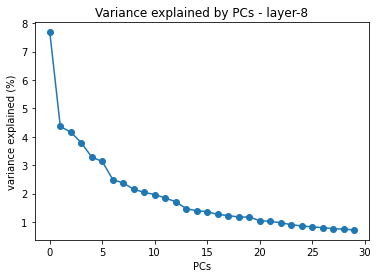

In [20]:
from sklearn.decomposition import PCA
layer = 8
feats = features[layer]
pca = PCA(n_components=30)
pca.fit(feats)

var_exp = pca.explained_variance_ratio_
print(var_exp)
print(sum(var_exp))
plt.plot(var_exp*100, marker='o')
plt.ylabel("variance explained (%)")
plt.xlabel("PCs")
plt.title(f"Variance explained by PCs - layer-{layer}")

### Percentage of variance explained...!
The variance explained by first two principle components for all layers of $'wav2letter\_modified'$ given below:

|Variance explained | Layer-0 | Layer-1 | Layer-2 | Layer-3 | Layer-4 | Layer-5 | Layer-6 | Layer-7 | Layer-8 | Layer-9 | Layer-10 | Layer-11 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|pc1 (%)  |60.7|48.4|53.9|31.7|18.0|9.4 |10.1|9.0 |7.8 |6.4 |7.7 |3.5|
|pc2 (%)  |10.9|10.5|8.2 |8.7 |7.7 |8.6 |7.1 |6.2 |4.3 |5.2 |6.1 |2.8|
|Total (%)|71.6|58.9|62.1|40.5|25.8|18.0|17.2|15.3|12.1|11.7|13.8|6.3|

### PCA: projecting onto 2d space...!

In [110]:
# def populate_df(df, pcs, session, spikes, ch, threshold=5):
#     df1 = pd.DataFrame(columns = ['pc1', 'pc2', 'spike_rate', 'activity', 'session'])
#     df1['pc1'] = pcs[:,0]
#     df1['pc2'] = pcs[:,1]
#     df1['spike_rate'] = spikes[:, ch]
#     df1['activity'] = ['low']*df1.shape[0]
#     ids = df1.index[df1['spike_rate'] > 5].tolist()
#     df1.iloc[ids,3] = 'high'
#     df1['session'] = float(session)*np.ones(df1.shape[0])
    
#     out = pd.concat([df, df1])
#     return out

In [58]:
def populate_df(df, pcs, session, spikes, ch):
    df1 = pd.DataFrame(columns = ['pc1', 'pc2', 'spike_rate', 'session', 'channel'], dtype=np.float32)
    df1['pc1'] = pcs[:,0]
    df1['pc2'] = pcs[:,1]
    df1['spike_rate'] = spikes[:, ch]
    df1['session'] = float(session)*np.ones(df1.shape[0])
    df1['channel'] = float(ch)*np.ones(df1.shape[0])
    
    out = pd.concat([df, df1])
    return out

def plot_kde(data, ch):
    select_ch = data[data['channel'] == ch]
    sns.kdeplot(data=select_ch, x='pc1', y='pc2', weights='spike_rate', levels=[0.75, 0.8, 0.85, 0.90], label=data['session'].unique()[0])



In [39]:
df = pd.DataFrame(columns = ['pc1', 'pc2', 'spike_rate', 'session', 'channel'], dtype=np.float32)


In [7]:
layer = 0
# getting the features ..!
features = obj.get_features(layer)

# # Finding pc space 
pca = PCA(n_components=2)
pcs = pca.fit_transform(features)

In [8]:
# session = 200206
# ch = 32
# df = populate_df(df, pcs, session, spikes_200206, ch)

In [40]:
channels = [10, 17, 24, 32, 42, 62]
session = 200206
for ch in channels:
    df = populate_df(df, pcs, session, spikes_200206, ch)

,pc1,pc2,spike_rate,session,channel
0,-6.578923,-1.106592,0.0,200206.0,32.0
1,-6.318537,-0.757987,0.0,200206.0,32.0
2,-6.616302,-1.144240,0.0,200206.0,32.0
3,-6.293566,-0.714161,0.0,200206.0,32.0
4,-6.639050,-1.206808,0.0,200206.0,32.0
...,...,...,...,...,...
51328,-6.438652,-0.949885,0.0,200206.0,32.0
51329,-6.416780,-0.881818,0.0,200206.0,32.0
51330,-6.464047,-1.009099,0.0,200206.0,32.0
51331,-6.455262,-0.897353,0.0,200206.0,32.0


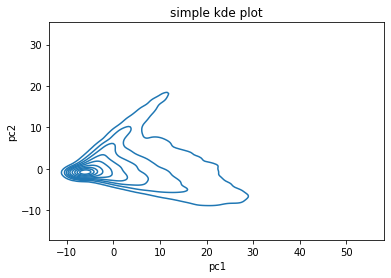

In [10]:
sns.kdeplot(data=df, x='pc1', y='pc2')
plt.title('simple kde plot')
plt.show()

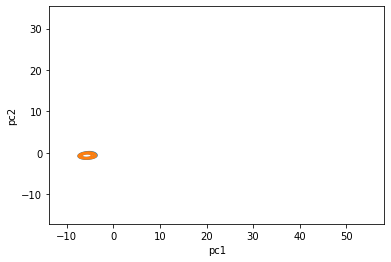

In [46]:
plot_kde(df, 32)
plot_kde(df, 62)

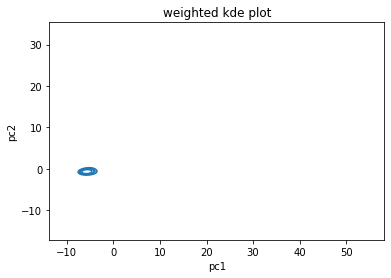

In [32]:
sns.kdeplot(data=df, x='pc1', y='pc2', weights='spike_rate', levels=[0.75, 0.8, 0.85, 0.90])
plt.title('weighted kde plot')
plt.show()

In [54]:
sum(df['spike_rate'] == 0)/df['spike_rate'].size

0.558627004071455

### Histogram using numpy...!

In [12]:
xedges = np.linspace(-15, 30, 100)
yedges = np.linspace(-15, 30, 100)

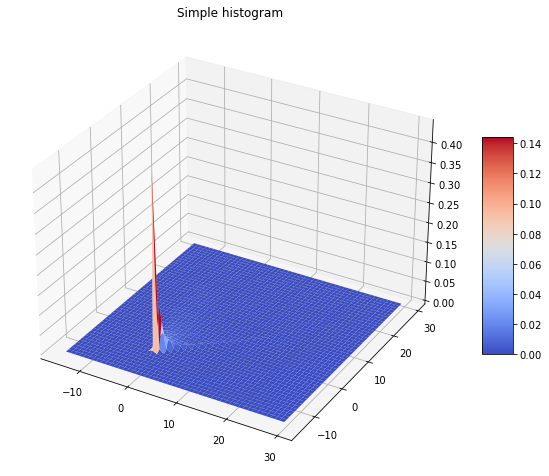

In [20]:
hist_out = np.histogram2d(x = df['pc1'], y = df['pc2'], density=True, bins=[xedges, yedges])#, weights=df['spike_rate'])
x,y = np.meshgrid(hist_out[1][:-1], hist_out[2][:-1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, hist_out[0], cmap=plt.cm.coolwarm)
plt.colorbar(surf, shrink=0.4, aspect=7)
plt.title("Simple histogram")
plt.show()

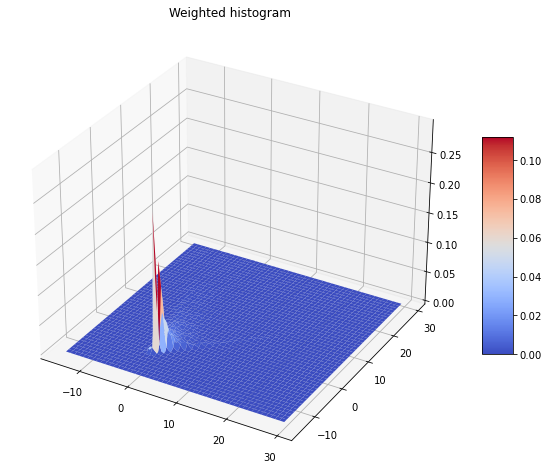

In [21]:
hist_out = np.histogram2d(x = df['pc1'], y = df['pc2'], density=True, bins=[xedges, yedges], weights=df['spike_rate'])
x,y = np.meshgrid(hist_out[1][:-1], hist_out[2][:-1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, hist_out[0], cmap=plt.cm.coolwarm)
plt.colorbar(surf, shrink=0.4, aspect=7)
plt.title("Weighted histogram")

plt.show()

### zoomed-in

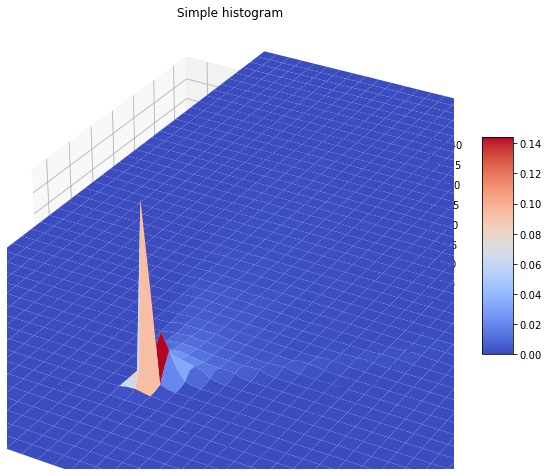

In [30]:
hist_out = np.histogram2d(x = df['pc1'], y = df['pc2'], density=True, bins=[xedges, yedges])#, weights=df['spike_rate'])
x,y = np.meshgrid(hist_out[1][:-1], hist_out[2][:-1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, hist_out[0], cmap=plt.cm.coolwarm)
plt.colorbar(surf, shrink=0.4, aspect=7)
plt.title("Simple histogram")
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()

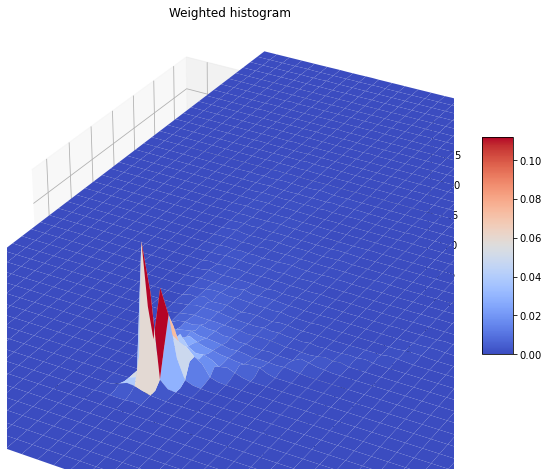

In [31]:
hist_out = np.histogram2d(x = df['pc1'], y = df['pc2'], density=True, bins=[xedges, yedges], weights=df['spike_rate'])
x,y = np.meshgrid(hist_out[1][:-1], hist_out[2][:-1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, hist_out[0], cmap=plt.cm.coolwarm)
plt.colorbar(surf, shrink=0.4, aspect=7)
plt.title("Weighted histogram")
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()

In [80]:
x.shape

(100, 100)

In [113]:
# ch = 32
# df['pc1'] = pcs[:,0]
# df['pc2'] = pcs[:,1]
# df['spike_rate'] = obj.spikes[:, ch]
# df['activity'] = ['low']*df.shape[0]
# ids = df.index[df['spike_rate'] > 5].tolist()
# df.iloc[ids,3] = 'high'

In [60]:
def plot_kde(df, session, layer = 0):
    ids = df.index[df['session'] == session].tolist()
    threshold = (df.iloc[ids]['spike_rate'].max() + df.iloc[ids]['spike_rate'].min())/2
    print(f"Threshold is: {threshold}")
    df.iloc[ids,4] = ['low']*len(ids)
    sub_ids = df.iloc[ids,:].index[df.iloc[ids,2] > threshold].tolist()
    df.iloc[sub_ids,4] = 'high'

    sns.kdeplot(data=df.iloc[ids,:], x='pc1', y='pc2', hue='activity')
#     plt.xlim([-12,10])
#     plt.ylim([-10, 10])
    plt.title(f'sub-{session}, layer-{layer}, ch-{ch} PCA for features')
    

Threshold is: 4.747725894481504


(-10.0, 10.0)

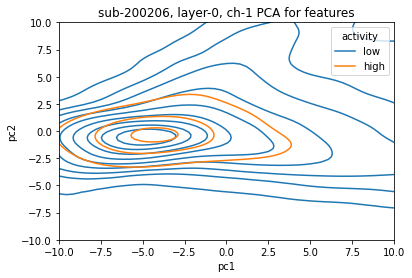

In [67]:
plot_kde(df, 200206)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

In [ ]:
# def plot_kde(df, session, ch, layer = 0):
#     data = df[df['session'] == session]
#     sns.kdeplot(data=df, x='pc1', y='pc2', hue='activity')
#     plt.xlim([-12,10])
#     plt.ylim([-10, 10])
#     plt.title(f'sub-{session}, layer-{layer}, ch-{ch} PCA for features')

In [ ]:
# sns.kdeplot(data=data,x='waiting',y='duration')

In [20]:
def select_and_normalize_spikes(spikes, ch):
    # re-ranging spikes between 0 and 1.
    mn = min(spikes[:,ch])
    mx = max(spikes[:,ch])
    normalized_spikes = (spikes[:,ch] + (-1*mn))/(mx+ (-1*mn))
    return normalized_spikes
subjects = []

In [61]:
sub = '200205'
obj = Reg.Regression(data_dir, sub, model=mod, load_features=False)
spikes_200205 = obj.load_spikes(numpy=True)

Creating dataset and other objects...
Creating regression obj for: 'wav2letter_modified'


In [62]:
df_200205 = pd.DataFrame(columns = ['pc1', 'pc2', 'spike_rate', 'session', 'channel'], dtype=np.float32)
sub = '200205'
session = sub
ch = 1
df_200205 = populate_df(df_200205, pcs, session, spikes_200205, ch)

In [54]:
sub = '200206'
obj = Reg.Regression(data_dir, sub, model=mod, load_features=False)
spikes_200206 = obj.load_spikes(numpy=True)

Creating dataset and other objects...
Creating regression obj for: 'wav2letter_modified'


In [55]:
df_200206 = pd.DataFrame(columns = ['pc1', 'pc2', 'spike_rate', 'session', 'channel'], dtype=np.float32)
sub = '200206'
session = sub
ch = 1
df_200206 = populate_df(df_200206, pcs, session, spikes_180808, ch)

In [50]:
sub = '180808'
obj = Reg.Regression(data_dir, sub, model=mod, load_features=False)
spikes_180808 = obj.load_spikes(numpy=True)


Creating dataset and other objects...
Creating regression obj for: 'wav2letter_modified'


In [51]:
df_180808 = pd.DataFrame(columns = ['pc1', 'pc2', 'spike_rate', 'session', 'channel'], dtype=np.float32)
sub = '180808'
session = sub
ch = 1
df_180808 = populate_df(df_180808, pcs, session, spikes_180808, ch)

In [52]:
sub = '191121'
obj = Reg.Regression(data_dir, sub, model=mod, load_features=False)
spikes_191121 = obj.load_spikes(numpy=True)

Creating dataset and other objects...
Creating regression obj for: 'wav2letter_modified'


NameError: name 'subjects' is not defined

In [53]:
df_191121 = pd.DataFrame(columns = ['pc1', 'pc2', 'spike_rate', 'session', 'channel'], dtype=np.float32)
sub = '191121'
session = sub
ch = 1
df_191121 = populate_df(df_191121, pcs, session, spikes_191121, ch)

### kde_plots

In [ ]:
plot_kde(df_191121, 1)
plot_kde(df_180808, 1)
plot_kde(df_200206, 1)
plot_kde(df_200205, 1)
plt.xlim([-10, -2])
plt.ylim([-4, 4])
plt.legend(loc='best')

In [60]:
df_200205

,pc1,pc2,spike_rate,session,channel


Threshold is: 4.747725894481504


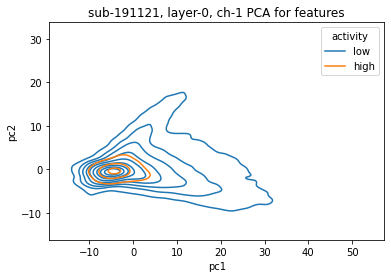

In [65]:
plot_kde(df, 191121)

Threshold is: 4.747725894481504


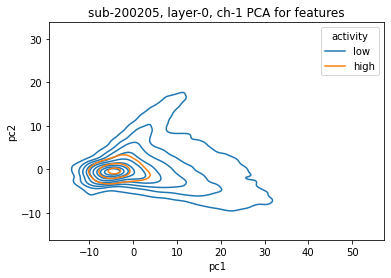

In [62]:
plot_kde(df, 200205)

Threshold is: 4.747725894481504


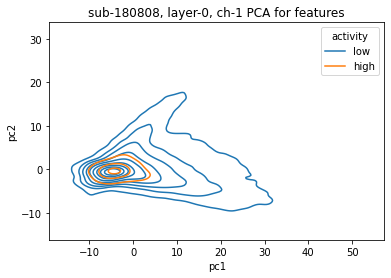

In [66]:
plot_kde(df, 180808)

In [ ]:
fig, ax = plt.subplots(nrows=2 ,ncols=2 , figsize=(8,8))
scale = 1
threshold = 0.5

layer = 3
# getting the features ..!
feats = features[layer]

# # Finding pc space 
pca = PCA(n_components=2)
pcs = pca.fit_transform(feats)
 
ch = 52
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_200205, ch)
select_pcs = pcs[np.where(spikes > threshold)[0], :]
select_spikes = spikes[np.where(spikes > threshold)[0]]
#plotting 2d space...!
ax[0][0].scatter(select_pcs[:,0], select_pcs[:,1])#, alpha=select_spikes*scale, label=f'{subjects[0]} ch-{ch}')
ax[0][0].set_title(f'{subjects[0]} ch-{ch}')
ax[0][0].set_xlim([-20, 60])
ax[0][0].set_ylim([-20, 35])

ch = 32
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_200206, ch)
select_pcs = pcs[np.where(spikes > threshold)[0], :]
select_spikes = spikes[np.where(spikes > threshold)[0]]
#plotting 2d space...!
ax[0][1].scatter(select_pcs[:,0], select_pcs[:,1])#, alpha=select_spikes*scale, label=f'{subjects[1]} ch-{ch}')
ax[0][1].set_title(f'{subjects[1]} ch-{ch}')
ax[0][1].set_xlim([-20, 60])
ax[0][1].set_ylim([-20, 35])

ch = 10
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_180808, ch)
select_pcs = pcs[np.where(spikes > threshold)[0], :]
select_spikes = spikes[np.where(spikes > threshold)[0]]
#plotting 2d space...!
ax[1][0].scatter(select_pcs[:,0], select_pcs[:,1])#, alpha=select_spikes*scale, label=f'{subjects[2]} ch-{ch}')
ax[1][0].set_title(f'{subjects[2]} ch-{ch}')
ax[1][0].set_xlim([-20, 60])
ax[1][0].set_ylim([-20, 35])

ch = 32
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_191121, ch)
select_pcs = pcs[np.where(spikes > threshold)[0], :]
select_spikes = spikes[np.where(spikes > threshold)[0]]
#plotting 2d space...!
ax[1][1].scatter(select_pcs[:,0], select_pcs[:,1])#, alpha=select_spikes*scale, label=f'{subjects[3]} ch-{ch}')
ax[1][1].set_title(f'{subjects[3]} ch-{ch}')
ax[1][1].set_xlim([-20, 60])
ax[1][1].set_ylim([-20, 35])

# plt.legend(loc='best')
plt.suptitle(f"Layer-{layer}")

### layer - 3

In [ ]:
layer = 3
# getting the features ..!
feats = features[layer]

# # Finding pc space 
pca = PCA(n_components=2)
pcs = pca.fit_transform(feats)

In [ ]:
ch = 32
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_200205, ch)


#plotting 2d space...!
plt.scatter(pcs[:,0], pcs[:,1], alpha=(spikes+0.1)/1.1, label=f'{subjects[0]} ch-{ch}')

ch = 32
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_200206, ch)
#plotting 2d space...!
plt.scatter(pcs[:,0], pcs[:,1], alpha=(spikes+0.1)/1.1, label=f'{subjects[1]} ch-{ch}')

ch = 10
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_180808, ch)
#plotting 2d space...!
plt.scatter(pcs[:,0], pcs[:,1], alpha=(spikes+0.1)/1.1, label=f'{subjects[2]} ch-{ch}')

ch = 32
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_191121, ch)
#plotting 2d space...!
plt.scatter(pcs[:,0], pcs[:,1], alpha=(spikes+0.1)/1.1, label=f'{subjects[3]} ch-{ch}')

plt.legend(loc='best')
plt.title(f"Layer-{layer}")

### layer 6

In [ ]:
layer = 6
# getting the features ..!
feats = features[layer]

# # Finding pc space 
pca = PCA(n_components=2)
pcs = pca.fit_transform(feats)

In [ ]:
ch = 32
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_200205, ch)


#plotting 2d space...!
plt.scatter(pcs[:,0], pcs[:,1], alpha=(spikes+0.1)/1.1, label=f'{subjects[0]} ch-{ch}')

ch = 32
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_200206, ch)
#plotting 2d space...!
plt.scatter(pcs[:,0], pcs[:,1], alpha=(spikes+0.1)/1.1, label=f'{subjects[1]} ch-{ch}')

ch = 10
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_180808, ch)
#plotting 2d space...!
plt.scatter(pcs[:,0], pcs[:,1], alpha=(spikes+0.1)/1.1, label=f'{subjects[2]} ch-{ch}')

ch = 32
# re-ranging spikes between 0 and 1.
spikes = select_and_normalize_spikes(spikes_191121, ch)
#plotting 2d space...!
plt.scatter(pcs[:,0], pcs[:,1], alpha=(spikes+0.1)/1.1, label=f'{subjects[3]} ch-{ch}')

plt.legend(loc='best')
plt.title(f"Layer-{layer}")

In [ ]:

# # Getting mapping/test split..!
# test_set_size = int(0.15*obj.sents.size)
# test_set = np.random.choice(obj.sents, test_set_size, replace=False)
# mapping_set = obj.sents[np.isin(obj.sents, test_set, invert=True)]

# # Getting 2d subspace...!
# mapping_features = obj.unroll_features(sents = mapping_set, numpy=True)[layer]
# test_features = obj.unroll_features(sents = test_set, numpy=True)[layer]


# # mapping test set to 2d space..!
# test_pcs = pca.transform(test_features)

# # Neural activity for selected channel..!
# neural_activity = obj.unroll_spikes(sents=test_set, numpy=True)[:,ch]

# # projected peak neural activity...!
# peaks = np.where(neural_activity > threshold)[0]
# peak_pcs = pca.transform(test_features[peaks,:])

# # projected neg peak neural activity...!
# neg_peaks = np.where(neural_activity < neg_threshold)[0]
# neg_peak_pcs = pca.transform(test_features[neg_peaks,:])

### Analyzing layer '11'..!

In [ ]:
# Finding pc space 
layer = 11
feats = obj.get_features(layer)
pca = PCA(n_components=2)
pca.fit(feats)

In [ ]:
sents = [496]

# mapping chosen sent to 2d space..!
test_feats = obj.unroll_features(sents=sents, numpy=True)
pcs = pca.transform(test_feats[layer])

# plotting features of chosen sent on 2d space
plt.scatter(pcs[:,0], pcs[:,1], label=f'sent-{sents[0]}')
plt.title(f"Layer-{layer}")
plt.legend(loc='best')
plt.xlim([-1.75, 1.75])
plt.ylim([-2, 3.1])
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')

In [ ]:
ch = 62
neural_activity = obj.unroll_spikes(sents=sents, numpy=True)[:,ch]
plt.plot(neural_activity)

In [ ]:
threshold = 0
peaks = np.where(neural_activity < threshold)[0]
pcs = pca.transform(test_feats[layer][peaks,:])
plt.scatter(pcs[:,0], pcs[:,1], label=f'sent-{sents[0]}')
plt.title(f"plotting samples corresponding to peak activity...!")
plt.legend(loc='best')
plt.xlim([-1.75, 1.75])
plt.ylim([-2, 3.1])
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')

### Analyzing layer '3'

In [ ]:
# Finding pc space 
layer = 3
feats = obj.get_features(layer)
pca = PCA(n_components=2)
pca.fit(feats)

In [ ]:
pcs = pca.transform(feats)
plt.scatter(pcs[:,0], pcs[:,1])
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')

In [ ]:
sents = [12, 13, 312, 444]

# mapping chosen sent to 2d space..!
test_feats = obj.unroll_features(sents=sents, numpy=True)
pcs = pca.transform(test_feats[layer])

# plotting features of chosen sent on 2d space
plt.scatter(pcs[:,0], pcs[:,1], label=f'sent-{sents[0]}')
plt.title(f"Layer-{layer}")
plt.legend(loc='best')
plt.xlim([-15, 30])
plt.ylim([-20, 20])
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')

In [ ]:
ch = 62
neural_activity = obj.unroll_spikes(sents=sents, numpy=True)[:,ch]
plt.plot(neural_activity)

In [ ]:
threshold = 5
peaks = np.where(neural_activity > threshold)[0]
pcs = pca.transform(test_feats[layer][peaks,:])
plt.scatter(pcs[:,0], pcs[:,1], label=f'sent-{sents[0]}')
plt.title(f"plotting samples corresponding to peak activity...!")
plt.legend(loc='best')
plt.xlim([-15, 30])
plt.ylim([-20, 20])
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')

### Analyzing layer 6...!

In [ ]:
# Finding pc space 
layer = 6
feats = obj.get_features(layer)
pca = PCA(n_components=2)
pca.fit(feats)

In [ ]:
pcs = pca.transform(feats)
plt.scatter(pcs[:,0], pcs[:,1])
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')

In [ ]:
sents = [12, 13, 312, 444]

# mapping chosen sent to 2d space..!
test_feats = obj.unroll_features(sents=sents, numpy=True)
pcs = pca.transform(test_feats[layer])

# plotting features of chosen sent on 2d space
plt.scatter(pcs[:,0], pcs[:,1], label=f'sent-{sents[0]}')
plt.title(f"Layer-{layer}")
plt.legend(loc='best')
plt.xlim([-10, 13])
plt.ylim([-6, 12])
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')

In [ ]:
ch = 62
neural_activity = obj.unroll_spikes(sents=sents, numpy=True)[:,ch]
plt.plot(neural_activity)

In [ ]:
threshold = 6.5
peaks = np.where(neural_activity > threshold)[0]
pcs = pca.transform(test_feats[layer][peaks,:])
plt.scatter(pcs[:,0], pcs[:,1], label=f'sent-{sents[0]}')
plt.title(f"plotting samples corresponding to peak activity...!")
plt.legend(loc='best')
plt.xlim([-10, 13])
plt.ylim([-6, 12])
plt.axhline(y=0, c='r', linestyle='--')
plt.axvline(x=0, c='r', linestyle='--')

### layer 6 with mapping/test split..!

In [ ]:
layer = 0
ch = 32
threshold = 8
neg_threshold = -1.8

# Getting mapping/test split..!
test_set_size = int(0.15*obj.sents.size)
test_set = np.random.choice(obj.sents, test_set_size, replace=False)
mapping_set = obj.sents[np.isin(obj.sents, test_set, invert=True)]

# Getting 2d subspace...!
mapping_features = obj.unroll_features(sents = mapping_set, numpy=True)[layer]
test_features = obj.unroll_features(sents = test_set, numpy=True)[layer]

# Finding pc space 
pca = PCA(n_components=2)
mapping_pcs = pca.fit_transform(mapping_features)

# mapping test set to 2d space..!
test_pcs = pca.transform(test_features)

# Neural activity for selected channel..!
neural_activity = obj.unroll_spikes(sents=test_set, numpy=True)[:,ch]

# projected peak neural activity...!
peaks = np.where(neural_activity > threshold)[0]
peak_pcs = pca.transform(test_features[peaks,:])

# projected neg peak neural activity...!
neg_peaks = np.where(neural_activity < neg_threshold)[0]
neg_peak_pcs = pca.transform(test_features[neg_peaks,:])

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

plt.suptitle(f"Layer-{layer}, ch-{ch}")
# mapping set..!
ax[0][0].scatter(mapping_pcs[:,0], mapping_pcs[:,1])
ax[0][0].axhline(y=0, c='r', linestyle='--')
ax[0][0].axvline(x=0, c='r', linestyle='--')
ax[0][0].set_title("projections of mapping set on 2d space")

# plotting features of chosen sent on 2d space
ax[0][1].scatter(test_pcs[:,0], test_pcs[:,1], label=f'projected test set')
ax[0][1].set_title(f"projected test set")
ax[0][1].set_xlim([-10, 11])
ax[0][1].set_ylim([-6, 12])
ax[0][1].axhline(y=0, c='r', linestyle='--')
ax[0][1].axvline(x=0, c='r', linestyle='--')

# Plotting neural activity for test set..!
neural_activity = obj.unroll_spikes(sents=test_set, numpy=True)[:,ch]
ax[1][0].plot(neural_activity)
ax[1][0].set_title("Neural activity for test set")

# pcs for peak activity only..!
ax[1][1].scatter(peak_pcs[:,0], peak_pcs[:,1], label='peak')
ax[1][1].scatter(neg_peak_pcs[:,0], neg_peak_pcs[:,1], label='neg peak')
ax[1][1].legend(loc='best')
ax[1][1].set_title(f"samples corresponding to peak activity...!")
# ax[1][1].set_xlim([-10, 11])
# ax[1][1].set_ylim([-6, 12])
ax[1][1].axhline(y=0, c='r', linestyle='--')
ax[1][1].axvline(x=0, c='r', linestyle='--')

In [ ]:
sns.kdeplot()